In [2]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

# Q1 Sobel

## a)

In [3]:
# generate random matrix with size n*n
def generateRandomMatrix(n):
    matrix=np.random.randint(0, 256,size=(10,10))
    matrix=np.float32(matrix)
    return matrix  

In [4]:
# write convolution function
def convolve(matrix, kernel):
    #get kernel size
    kersize=kernel.shape[0]
    #get padding size
    padsize=kersize//2
    matrixaddpad=np.pad(matrix,(padsize,padsize), mode='reflect')
    # Create new matrix to store convolved values
    newmatrix = np.zeros_like(matrix)
    
    for i in range(padsize,matrixaddpad.shape[0]-padsize):
      for j in range(padsize,matrixaddpad.shape[1]-padsize):
        win=matrixaddpad[i-padsize:i+padsize+1,j-padsize:j+padsize+1]
        #convolve win and kernel
        conv=np.sum(win*kernel)
        newmatrix[i-padsize,j-padsize]=conv
    
    newmatrix=np.float32(newmatrix)    
    return newmatrix

In [5]:
# generate horizontal and vertical kernels
sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

[[ 93.  37.  23.  83.  60. 169.   8. 223. 142. 198.]
 [156. 158.   5. 137.  20.  92.   7. 197. 123.  97.]
 [148. 174. 153.  51.  97. 188.  34.  48. 141.  96.]
 [176. 221.  53.  71. 187. 103. 218.  99. 137. 234.]
 [229. 218. 190. 220. 102. 204.  73. 242. 103. 217.]
 [ 34.  29. 194.  60. 223. 144.  81. 191. 253. 169.]
 [116.  69. 126. 145.  24.  17. 209. 239. 246.  79.]
 [145. 180.  51. 143.  46. 204. 162.  23. 194. 120.]
 [132. 214. 101. 158. 129. 166.  37.  29. 242. 123.]
 [223.   8.  80.  29. 100. 149.  27.  79. 237. 162.]]


<Figure size 640x480 with 0 Axes>

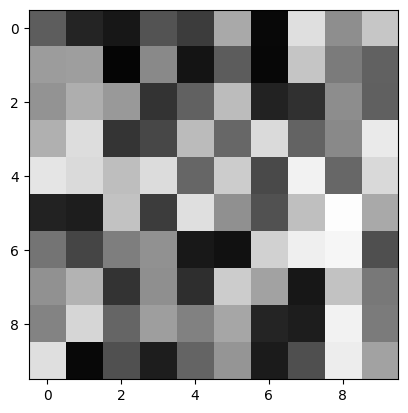

<Figure size 640x480 with 0 Axes>

In [6]:
# convolve the initial matrix with kernels
matrix=generateRandomMatrix(10)
print(matrix)
newmatrix_x = convolve(matrix, sobel_x)
newmatrix_y =convolve(matrix, sobel_y)
plt.imshow(matrix,cmap='gray',vmin=0,vmax=255)
plt.figure()


(-0.5, 9.5, 9.5, -0.5)

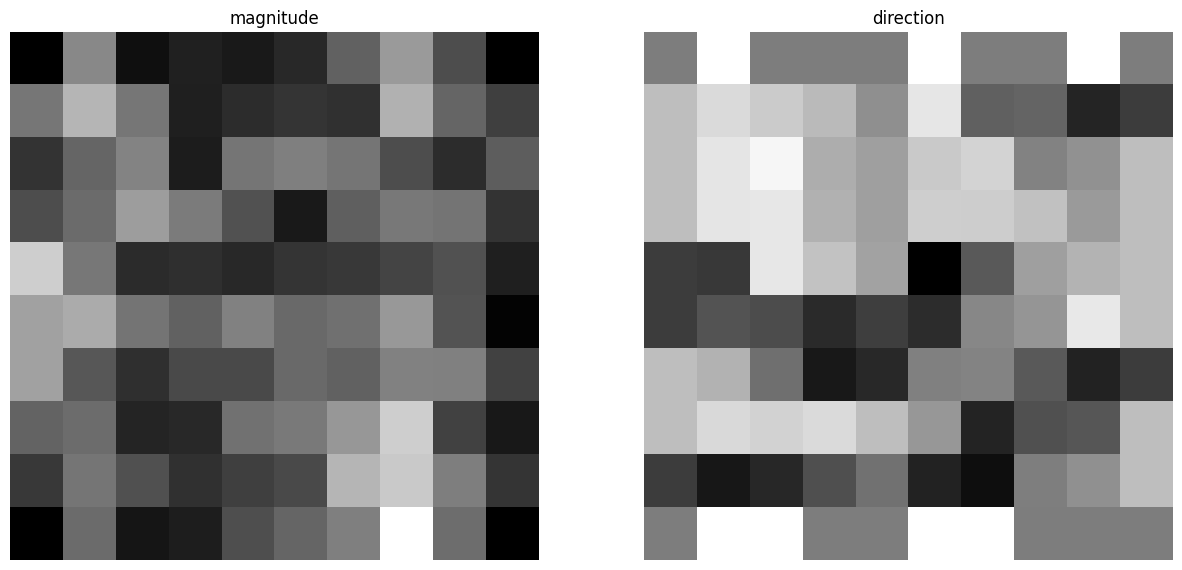

In [9]:
# generate magnitude and direction matrixes
magnitude=np.sqrt(newmatrix_x**2+newmatrix_y**2)
direction = np.arctan2(newmatrix_y, newmatrix_x)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(magnitude,cmap='gray')
plt.title("magnitude")
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(direction,cmap='gray')
plt.title("direction")
plt.axis("off")


## b)

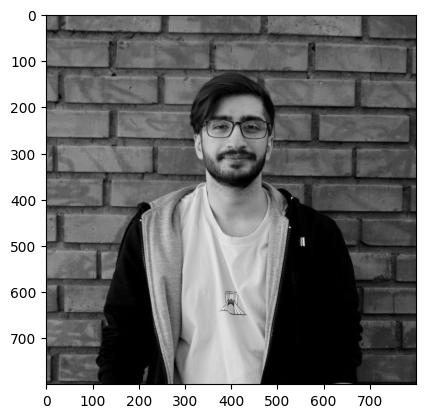

In [10]:
# load image and convert it to gray scale
img = cv2.imread(r'images/afshin.jpg')
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg, cmap='gray')
plt.show()

# cv2.imshow('Grayscale Image', grayimg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [11]:
# define gaussian kernel

# define the size of the kernel
kernelsize = 15

# define the variance of the Gaussian distribution
variance = 1.5

kernel = np.zeros((kernelsize, kernelsize))

# calculate the center position of the kernel
center = kernelsize // 2

# calculate the values of the kernel
for i in range(kernelsize):
    for j in range(kernelsize):
        x = i - center
        y = j - center
        kernel[i, j] = (1 / (2 * np.pi * variance)) * np.exp(-(x**2 + y**2) / (2 * variance))

# normalize the kernel
kernelgussi = kernel / np.sum(kernel)

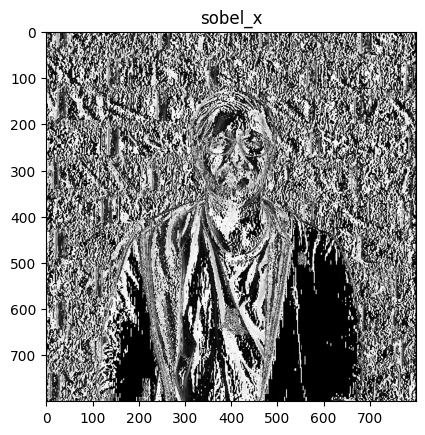

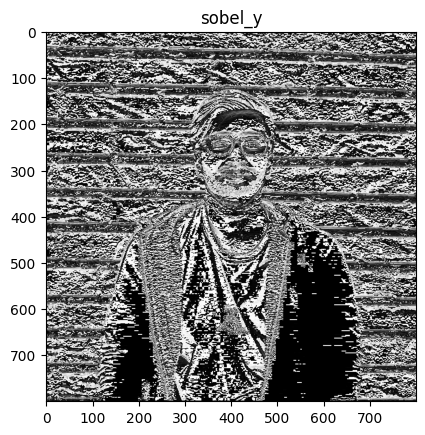

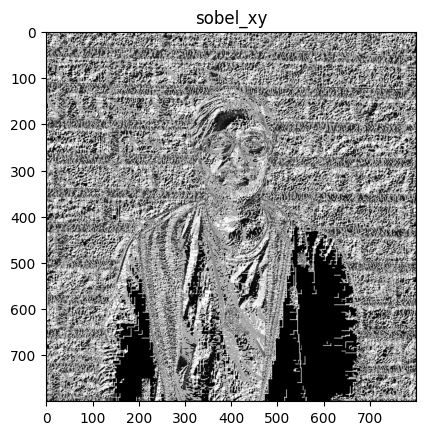

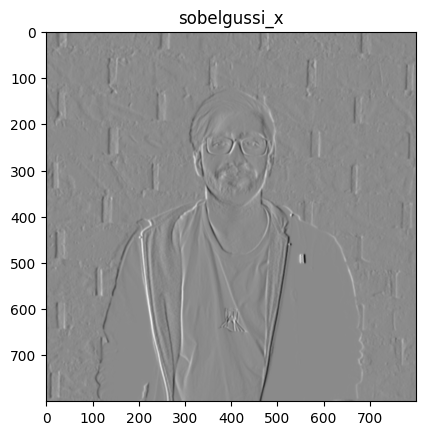

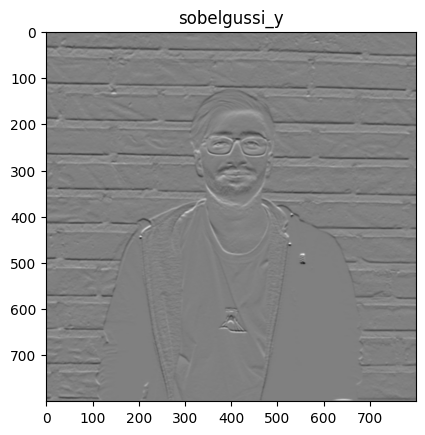

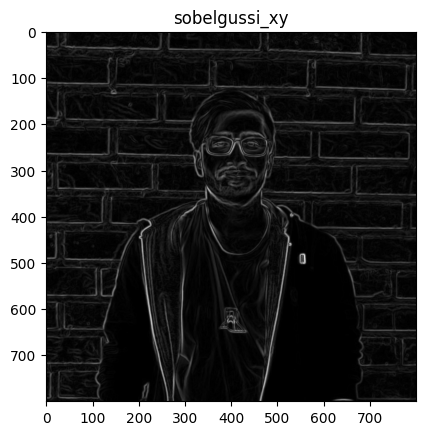

In [12]:
# generate Sobel outputs for 2 cases with gaussion filter and without gaussion filter and compare them

# sobel_x without gussi
newimg_x = convolve(grayimg, sobel_x)
plt.imshow(newimg_x, cmap='gray')
plt.title('sobel_x')
plt.show()

gussiimg=convolve(grayimg,kernelgussi)

# sobel_y without gussi
newimg_y = convolve(grayimg, sobel_y)
plt.imshow(newimg_y, cmap='gray')
plt.title('sobel_y')
plt.show()

newimg_xy=np.sqrt(newimg_x**2+newimg_y**2)
plt.imshow(newimg_xy, cmap='gray')
plt.title('sobel_xy')
plt.show()


# sobel_x with gussi
newimggussi_x=convolve(gussiimg,sobel_x)
plt.imshow(newimggussi_x, cmap='gray')
plt.title('sobelgussi_x')
plt.show()


# sobel_y with gussi
newimggussi_y=convolve(gussiimg,sobel_y)
plt.imshow(newimggussi_y, cmap='gray')
plt.title('sobelgussi_y')
plt.show()


newimggussi_xy=np.sqrt(newimggussi_x**2+newimggussi_y**2)
plt.imshow(newimggussi_xy, cmap='gray')
plt.title('sobelgussi_xy')
plt.show()


## c)

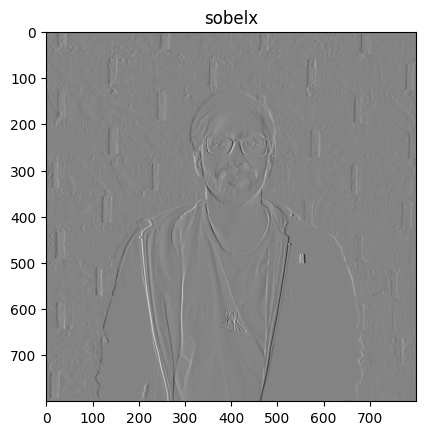

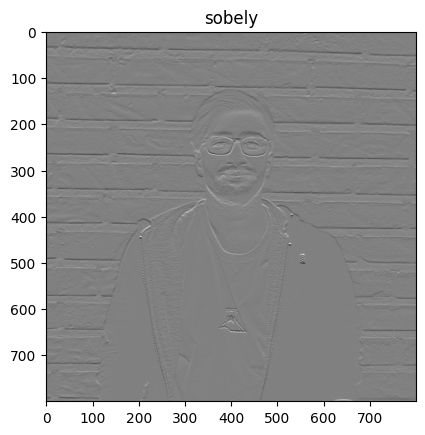

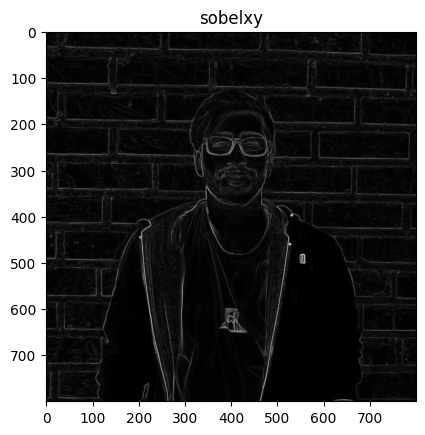

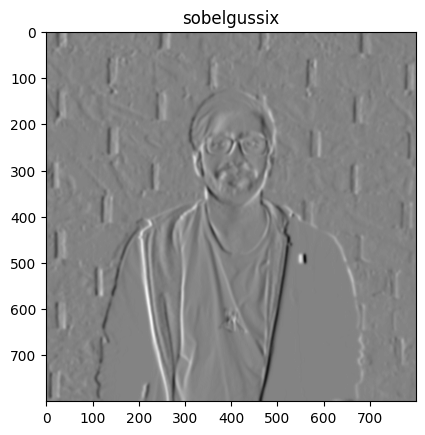

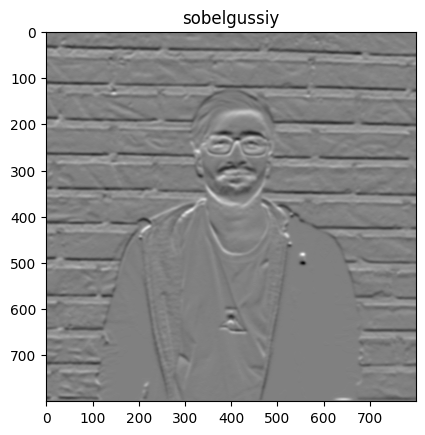

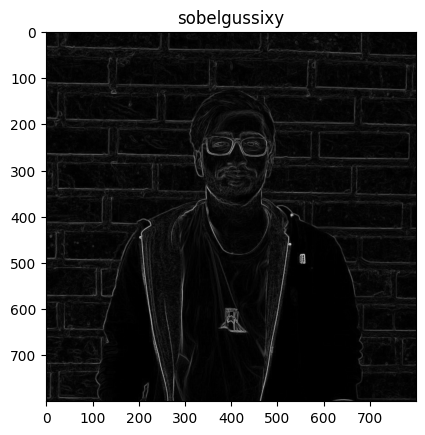

In [14]:
# do the operations in part b with OpenCV Sobel method and describe its parameters

# Calculation of Sobel filter in the x direction
sobelx=cv2.Sobel(grayimg,cv2.CV_64F,1,0,ksize=3,scale=1,delta=0)
plt.imshow(sobelx, cmap='gray')
plt.title('sobelx')
plt.show()

# Calculation of Sobel filter in the y direction
sobely=cv2.Sobel(grayimg,cv2.CV_64F,0,1,ksize=3,scale=1,delta=0)
plt.imshow(sobely, cmap='gray')
plt.title('sobely')
plt.show()

# calculate the Sobel filter in both x and y directions
sobelxy = np.sqrt(sobelx**2 + sobely**2)
plt.imshow(sobelxy, cmap='gray')
plt.title('sobelxy')
plt.show()





gussiimg=cv2.GaussianBlur(grayimg,(15,15),0)

# Calculation of Sobel filter in the x direction
sobelxgussi=cv2.Sobel(gussiimg,cv2.CV_64F,1,0,ksize=3,scale=1,delta=0)
plt.imshow(sobelxgussi, cmap='gray')
plt.title('sobelgussix')
plt.show()

# Calculation of Sobel filter in the y direction
sobelygussi=cv2.Sobel(gussiimg,cv2.CV_64F,0,1,ksize=3,scale=1,delta=0)
plt.imshow(sobelygussi, cmap='gray')
plt.title('sobelgussiy')
plt.show()

# calculate the Sobel filter in both x and y directions
sobelgussixy = np.sqrt(sobelxgussi**2 + sobelygussi**2)
plt.imshow(sobelxy, cmap='gray')
plt.title('sobelgussixy')
plt.show()
